# Import dependencies

In [25]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read data

In [4]:
# Reading text from txt file
with open('../data/origin/transactions.txt') as txt_file:
    lines = txt_file.readlines()

# Text in text file was in JSON format
# Converting text lines to JSON format and then restructuring as a dataframe 
trxn_data = []
for line in lines:
    trxn_data.append(json.loads(line))

# Replacing blank fields with NaN values
df = pd.DataFrame(trxn_data)
df = df.replace(r'', np.NaN)
print('Data has been successfully loaded.')

Data has been successfully loaded.


C:\Users\gorba\AppData\Local\Temp\ipykernel_15488\3961230338.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(r'', np.NaN)


In [5]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [6]:
# function to find out base info about dataset
def simple_eda(df):
    total_na = df.isna().sum().sum()
    col_name = df.columns
    dtypes = df.dtypes
    uniq = df.nunique()
    na_val = df.isna().sum()
    duplicate_indices = df[df.duplicated()].index
    print('Dimensions:', df.shape[0], ' - rows', df.shape[1], ' - columns')
    print('Total NA\'s', total_na)
    if len(duplicate_indices) > 0:
        print('Duplicate rows indeces: ', duplicate_indices)
    else:
        print('There are no duplicates in this dataset!') 
    print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "Count Distinct", "NA Values"))
    for i in range(len(df.columns)):
        print("%38s %10s     %10s %10s" % (col_name[i], dtypes[i], uniq[i], na_val[i]))

In [7]:
simple_eda(df)

Dimensions: 786363  - rows 29  - columns
Total NA's 4728625
There are no duplicates in this dataset!
                           Column Name  Data Type     Count Distinct  NA Values
                         accountNumber     object           5000          0
                            customerId     object           5000          0
                           creditLimit    float64             10          0
                        availableMoney    float64         521916          0
                   transactionDateTime     object         776637          0
                     transactionAmount    float64          66038          0
                          merchantName     object           2490          0
                            acqCountry     object              4       4562
                   merchantCountryCode     object              4        724
                          posEntryMode     object              5       4054
                      posConditionCode     object          

C:\Users\gorba\AppData\Local\Temp\ipykernel_15488\1163208193.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%38s %10s     %10s %10s" % (col_name[i], dtypes[i], uniq[i], na_val[i]))


### Dataset Column Descriptions:

1. **`accountNumber`**:  
   The account number related to the transaction.

2. **`customerId`**:  
   A unique identifier for the customer.

3. **`creditLimit`**:  
   The credit limit of the customer’s account, indicating the maximum amount they are allowed to spend.

4. **`availableMoney`**:  
   The available funds on the customer’s account at the time of the transaction.

5. **`transactionDateTime`**:  
   The date and time when the transaction occurred.

6. **`transactionAmount`**:  
   The amount of money involved in the transaction.

7. **`merchantName`**:  
   The name of the merchant where the transaction took place.

8. **`acqCountry`**:  
   The country where the payment instrument (e.g., card) was issued.

9. **`merchantCountryCode`**:  
   The country code of the merchant’s location.

10. **`posEntryMode`**:  
    Describes how the card details were entered at the point of sale (e.g., chip, magnetic stripe, manual entry).

11. **`posConditionCode`**:  
    The condition at the point of sale during the transaction (e.g., whether the card was physically present or not) ???

12. **`merchantCategoryCode`**:  
    A code that represents the category of the merchant’s business (e.g., restaurant, clothing store).

13. **`currentExpDate`**:  
    The current expiration date of the card involved in the transaction.

14. **`accountOpenDate`**:  
    The date when the customer’s account was opened.

15. **`dateOfLastAddressChange`**:  
    The last time the customer changed their address.

16. **`cardCVV`**:  
    The CVV code associated with the card used for the transaction.

17. **`enteredCVV`**:  
    The CVV code entered by the customer during the transaction.

18. **`cardLast4Digits`**:  
    The last 4 digits of the card used in the transaction. Used to identify the specific card in use.

19. **`transactionType`**:  
    The type of transaction (e.g., purchase, withdrawal, refund).

20. **`echoBuffer`**:  
    A technical field that might contain auxiliary information related to the transaction.

21. **`currentBalance`**:  
    The account balance after the transaction has been processed.

22. **`merchantCity`**:  
    The city where the merchant is located.

23. **`merchantState`**:  
    The state where the merchant is located (applicable mostly to U.S. transactions).

24. **`merchantZip`**:  
    The postal code of the merchant's location.

25. **`cardPresent`**:  
    Indicates whether the physical card was present during the transaction (`True`/`False`).

26. **`posOnPremises`**:  
    Specifies whether the transaction occurred on the merchant’s premises or remotely (e.g., online).

27. **`recurringAuthInd`**:  
    Indicates whether the transaction is part of a recurring authorization (e.g., subscription).

28. **`expirationDateKeyInMatch`**:  
    Indicates if the entered expiration date matches the card’s actual expiration date (`True`/`False`).

29. **`isFraud`**:  
    A label indicating whether the transaction is fraudulent (`True`/`False`). This is the target variable for  anomaly detection model.


## Drop empty/useless columns

In [8]:
df = df.drop(columns={'recurringAuthInd', 'posOnPremises', 'merchantZip', 'merchantState', 'merchantCity', 'echoBuffer'})
simple_eda(df)

Dimensions: 786363  - rows 23  - columns
Total NA's 10447
There are no duplicates in this dataset!
                           Column Name  Data Type     Count Distinct  NA Values
                         accountNumber     object           5000          0
                            customerId     object           5000          0
                           creditLimit    float64             10          0
                        availableMoney    float64         521916          0
                   transactionDateTime     object         776637          0
                     transactionAmount    float64          66038          0
                          merchantName     object           2490          0
                            acqCountry     object              4       4562
                   merchantCountryCode     object              4        724
                          posEntryMode     object              5       4054
                      posConditionCode     object            

C:\Users\gorba\AppData\Local\Temp\ipykernel_15488\1163208193.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%38s %10s     %10s %10s" % (col_name[i], dtypes[i], uniq[i], na_val[i]))


In [9]:
# On the surface it seems that column accountNumber equals customerId. 
# So if it is true - let`s drop one of them

if(len(df[df.accountNumber != df.customerId]) == 0):
    df = df.drop(columns={'customerId'})
    simple_eda(df)

Dimensions: 786363  - rows 22  - columns
Total NA's 10447
There are no duplicates in this dataset!
                           Column Name  Data Type     Count Distinct  NA Values
                         accountNumber     object           5000          0
                           creditLimit    float64             10          0
                        availableMoney    float64         521916          0
                   transactionDateTime     object         776637          0
                     transactionAmount    float64          66038          0
                          merchantName     object           2490          0
                            acqCountry     object              4       4562
                   merchantCountryCode     object              4        724
                          posEntryMode     object              5       4054
                      posConditionCode     object              3        409
                  merchantCategoryCode     object            

C:\Users\gorba\AppData\Local\Temp\ipykernel_15488\1163208193.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%38s %10s     %10s %10s" % (col_name[i], dtypes[i], uniq[i], na_val[i]))


## Cleaning/filling NA
I need to drop/fill NA before data splitting, feature engineering and modeling. But before cleaning NA i need to analyze columns with NA

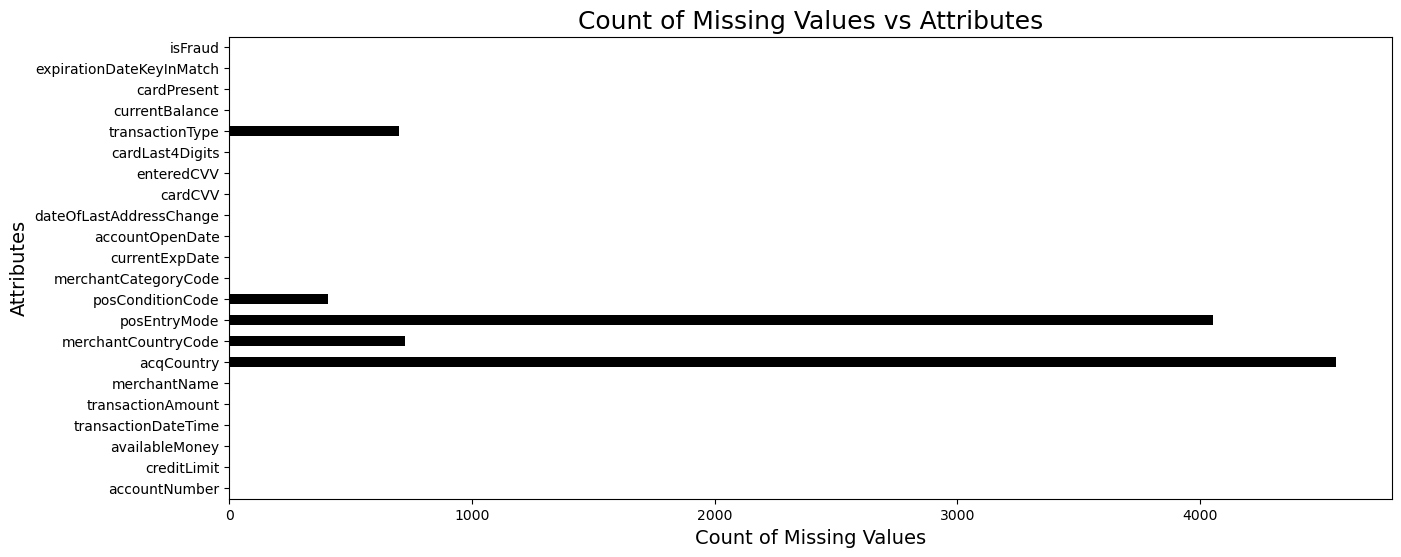

In [31]:
# Visualize null values

plt.figure(figsize=(15,6))
df.isnull().sum().plot(kind = 'barh', color='black')
plt.xlabel('Count of Missing Values', fontsize=14)
plt.ylabel('Attributes', fontsize=14)
plt.title('Count of Missing Values vs Attributes', fontsize=18)
plt.show()

In [42]:
# The most null values in categorical features, so let`s analyze them

categorical_columns = ['transactionType', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'isFraud', 'posConditionCode', 'merchantCategoryCode', 'expirationDateKeyInMatch', 'cardPresent' ]
melted = df[categorical_columns].melt(var_name='column', value_name='value')
value_counts = melted.value_counts().reset_index(name='counts')
sorted_df = value_counts.sort_values(by=['column', 'counts'])

sorted_df

,column,value,counts
41,acqCountry,PR,1538
38,acqCountry,CAN,2424
36,acqCountry,MEX,3130
2,acqCountry,US,774709
7,cardPresent,True,352868
6,cardPresent,False,433495
43,expirationDateKeyInMatch,True,1043
0,expirationDateKeyInMatch,False,785320
30,isFraud,True,12417
3,isFraud,False,773946


In [53]:
# Visualize categorical features

def show_pie_distribution_in_categorical_features(df, categorical_columns, title='Distribution of'):
    num_columns = len(categorical_columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(6, 4*num_columns))
    for i, col in enumerate(categorical_columns):
        category_counts = df[col].value_counts()
        colors = plt.cm.Paired(range(len(category_counts)))
        axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
        axes[i].set_title(title + ' ' + col)
        axes[i].axis('equal')
    plt.tight_layout()
    plt.show()

In [54]:
fraudDf = df[df['isFraud'] == True]
nonFraudDf = df[df['isFraud'] == False]

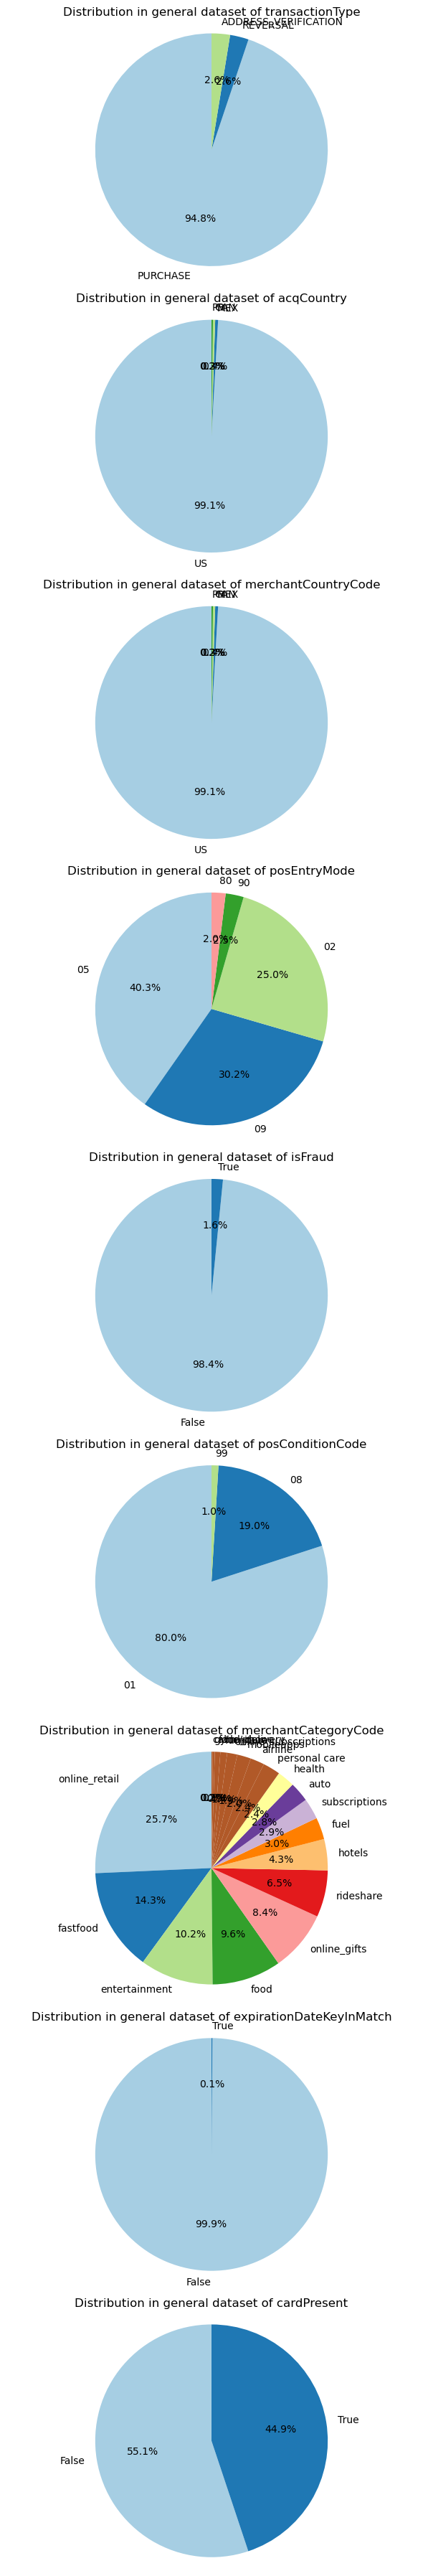

In [55]:
show_pie_distribution_in_categorical_features(df, categorical_columns, title='Distribution in general dataset of')

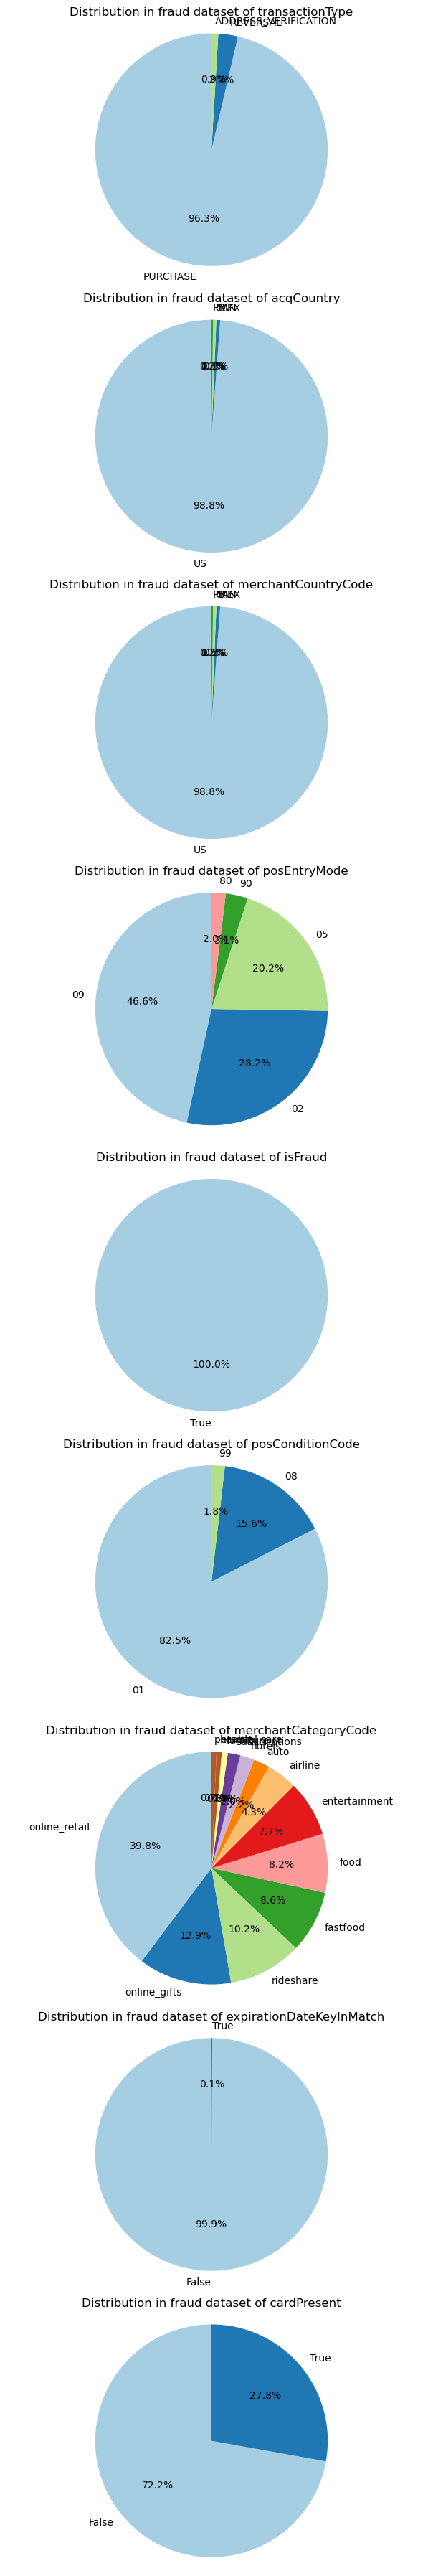

In [56]:
show_pie_distribution_in_categorical_features(fraudDf, categorical_columns, title='Distribution in fraud dataset of')

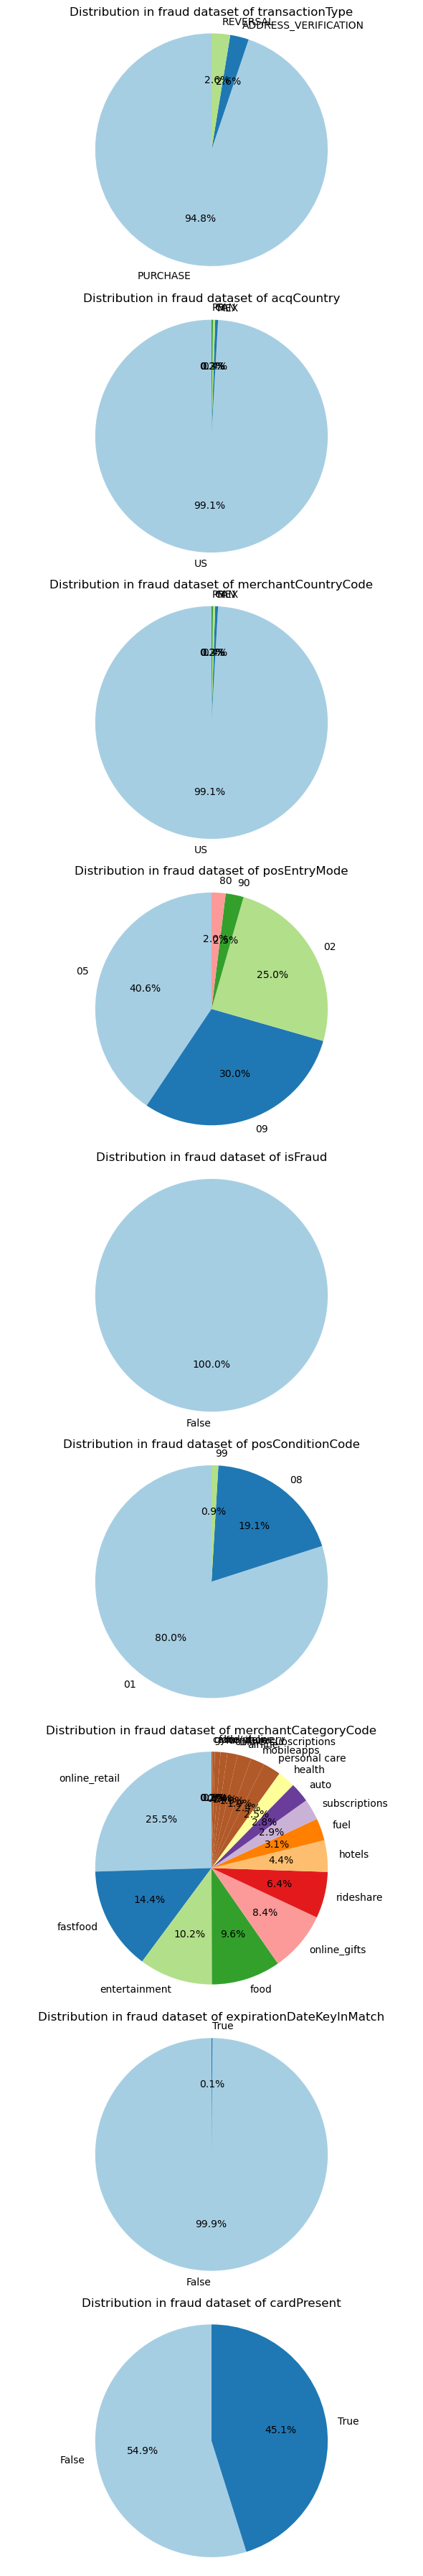

In [57]:
show_pie_distribution_in_categorical_features(nonFraudDf, categorical_columns, title='Distribution in fraud dataset of')

In [13]:
# Drop merchant name, card 4 digest,
# Describe df
# Make analyze with current exp date (does df have transaction with expired card)
# come up smth with account open date
# Find frequent transaction per similar account number (transaction date time)
# boxplot on money related column
# replace two cvv columns on matching marker
# fill na with mode
# 




# 1) ?? remember better to split data to train/test before or after preprocessing ??
# 2) ?? remember scaling and check for what purpose to use it
# 3) ?? investigate how to process different types of anomalies (point, context, group)
# 4) Clean/Fill NA
# 5)-1 Make some statistic data analyse, data distribution to find out nature of anomalies
# 5)-2 Investigate importance of each columns (maybe drop useless)

# Process categorical data
# Check correlation
# Check if data is imbalanced and fix it

# Model types
# Hybrid - cluster + classifier
# Ensemble